## Decision Trees
source: Wikipedia

In statistics, decision tree learning uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). It is one of the predictive modeling approaches used in statistics, data mining and machine learning. Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

In decision analysis, a decision tree can be used to visually and explicitly represent decisions and decision making. In data mining, a decision tree describes data (but the resulting classification tree can be an input for decision making).


https://en.wikipedia.org/wiki/Decision_tree_learning

#### Classification And Regression Trees
Decision trees used in data mining are of two main types:

 - Classification tree analysis is when the predicted outcome is the class (discrete) to which the data belongs.  
 - Regression tree analysis is when the predicted outcome can be considered a real number (e.g. the price of a house, or a patient's length of stay in a hospital).  

The term Classification And Regression Tree (CART) analysis is an umbrella term used to refer to both of the above procedures, first introduced by Breiman et al. in 1984. Trees used for regression and trees used for classification have some similarities - but also some differences, such as the procedure used to determine where to split.  

----

#### Classification
In machine learning and statistics, classification is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known. Examples are assigning a given email to the "spam" or "non-spam" class, and assigning a diagnosis to a given patient based on observed characteristics of the patient (sex, blood pressure, presence or absence of certain symptoms, etc.). Classification is an example of pattern recognition.

https://en.wikipedia.org/wiki/Statistical_classification

#### Regression
Regression analysis is primarily used for two conceptually distinct purposes. First, regression analysis is widely used for prediction and forecasting, where its use has substantial overlap with the field of machine learning. Second, in some situations regression analysis can be used to infer causal relationships between the independent and dependent variables. Importantly, regressions by themselves only reveal relationships between a dependent variable and a collection of independent variables in a fixed dataset. To use regressions for prediction or to infer causal relationships, respectively, a researcher must carefully justify why existing relationships have predictive power for a new context or why a relationship between two variables has a causal interpretation. The latter is especially important when researchers hope to estimate causal relationships using observational data.  

https://en.wikipedia.org/wiki/Regression_analysis

Uses for decision trees: 
 - should loan applicant be accepted or not based on history and other measures?
 - which drug is best for a particular patient?
 - is a cancerous cell malignant or benign?
 - is an email spam?



----

#### Understanding Decision Trees
Imagine that you are playing 20 Questions with your friend. They have thought of an object and you have to ask questions to determine the object. You are limited to 20 questions and the answers to the questions you ask must be answered with "yes" or "no". The object can be anything - a person, animal, thing. 

To play the game well, you need to ask good questions that split the possible objects to a narrower field to discover the object. Your first question might be "Is it alive?" rather than "Is it a cat?". You want to close in on the answer as quickly as possible by eliminating possibilities.

Decision Trees are similar. The goal is to design the splits to provide the most information gain - which is where the split makes the most difference. The model will examine the data to determine the most effective splits (or decisions) to make. Each node is a point where a question is asked, which divides the data into smaller subsets. A terminal node is created when it reaches the point that the data cannot be split smaller (also called purity).

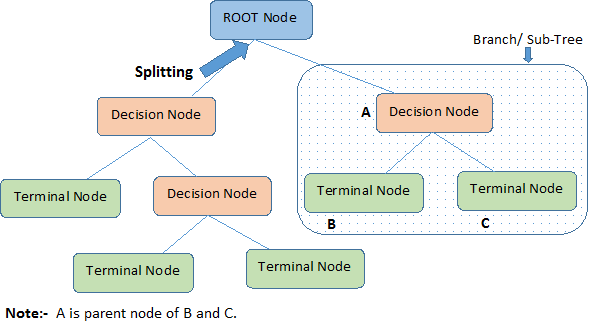

In [1]:
# We need to install the package for graphviz, so make sure to run this code. 
# After you run it the first time, you can comment out the line for graphviz so it doesn't try to install again.

# !pip install sklearn
# !pip install numpy
# !pip install pandas
!pip install graphviz

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


#### Package information for curious minds:
https://numpy.org/devdocs/user/absolute_beginners.html  
https://pandas.pydata.org/docs/getting_started/10min.html  
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html  
https://www.graphviz.org/  

Next we will import the libraries we need, starting with numpy and pandas.

In [2]:
# type the code to import numpy and pandas. hint: check how you imported in previous tutorials
import numpy as np
import pandas as pd

Now import the library for graphviz
>`import graphviz`

In [3]:
# type the code to import graphviz
import graphviz

We will use several modules from scikit-learn

>`from sklearn.tree import DecisionTreeClassifier`  
>`from sklearn.metrics import accuracy_score`  
>`from sklearn.preprocessing import LabelEncoder`  
>`from sklearn.datasets import load_iris`  
>`from sklearn import tree`

In [4]:
# type the code to import the sklearn modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn import tree

Finally, we import two modules to help display the visualizations for us.

>`from subprocess import call`  
>`from IPython.display import Image`

In [5]:
# type the code to import the subprocess and IPython.display modules
from subprocess import call
from IPython.display import Image

### Classification Tree
#### Our sample data
For this example, we are using a small golf dataset to predict whether or not someone will play golf based on different conditions.

Our data contains columns of categorical data representing the outlook, temperature (in degrees Fahrenheit and categorized), humidity (relative humidity and categorized), windy conditions and whether or not golf was played. Each row represents one day of data.

To start, import the dataset
>`golf_data = pd.read_csv('datasets/golf_dataset.csv')`

In [6]:
# type the code to import the data
golf_data = pd.read_csv('datasets/golf_dataset.csv')

Once the data is loaded, we should do some exploration to understand the data.
Start with determining the shape of the data.

>`print('Dataset length:', len(golf_data))`  
>`print('Data shape:', golf_data.shape)`

In [7]:
# type the code to explore the shape
print('Dataset length:', len(golf_data))
print('Data shape:', golf_data.shape)

Dataset length: 14
Data shape: (14, 7)


We can view the first 5 rows of data using `.head()`

>`golf_data.head()`

In [8]:
# type the code to display the first 5 rows of data
golf_data.head()

,outlook,temp,temperature,hum,humidity,windy,play
0,overcast,83,hot,86,high,False,yes
1,overcast,64,cool,65,normal,True,yes
2,overcast,72,mild,90,high,True,yes
3,overcast,81,hot,75,normal,False,yes
4,rainy,70,mild,96,high,False,yes


We will begin by using Label Encoder to transform the text values to numerical values. While we performed this transformation over several steps in the Naïve Bayes tutorial, we can condense the code to assign the transformed values to the `le_golf_data` table.  

Note that the columns to transform have been specified; this is to prevent Label Encoder from transforming the quantitative (numerical) information in the "temp" and "hum" columns.

>`le = LabelEncoder()`  
>`le_golf_data = golf_data[["outlook", "temperature", "humidity", "windy", "play"]].apply(le.fit_transform)`  

>`le_golf_data`

In [9]:
# type the code to use Label Encoder to create the le_golf_data table
le = LabelEncoder()
le_golf_data = golf_data[["outlook", "temperature", "humidity",
                         "windy", "play"]].apply(le.fit_transform)
le_golf_data

,outlook,temperature,humidity,windy,play
0,0,1,0,0,1
1,0,0,1,1,1
2,0,2,0,1,1
3,0,1,1,0,1
4,1,2,0,0,1
5,1,0,1,0,1
6,1,0,1,1,0
7,1,2,1,0,1
8,1,2,0,1,0
9,2,1,0,0,0


We need to specify the features and target for the model. The model will use the data of the features to predict the target. Our model is supervised learning, as we are providing information about the predicted value - we know the conditions in the features that occurred when golf was played, so our model can solve based on the previous information.   
>`features = ["outlook", "temperature", "humidity", "windy"]`  
>`target = ["play"]`

In [10]:
# type the code to specify features and target
features = ['outlook', 'temperature', 'humidity', 'windy']
target = ['play']

We will assign these to variables to make it easier to pass through our code.  
>`x = le_golf_data[features]`  
>`y = le_golf_data[target]`

In [11]:
# assign features to x and target to y
x = le_golf_data[features]
y = le_golf_data[target]

Display x and y to view the table.
>`x`  
>`y`

In [12]:
# type the code to display x
x

,outlook,temperature,humidity,windy
0,0,1,0,0
1,0,0,1,1
2,0,2,0,1
3,0,1,1,0
4,1,2,0,0
5,1,0,1,0
6,1,0,1,1
7,1,2,1,0
8,1,2,0,1
9,2,1,0,0


In [13]:
# type the code to display y
y

,play
0,1
1,1
2,1
3,1
4,1
5,1
6,0
7,1
8,0
9,0


The classification model will convert the text to numbers. To make it readable for us, we will pass a variable through the label encoder to translate the response for us at the end.

>`le_play = LabelEncoder()`  
>`le_play.fit(golf_data["play"])`  
>`list(le_play.classes_)`  

In [14]:
# type the code to create the le_play variable 
le_play = LabelEncoder()
le_play.fit(golf_data["play"]) 
list(le_play.classes_)

['no', 'yes']

#### Gini Model

Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Gini scores are between 1 and 0, but the maximum score adjusts based on the number of targets. Gini is a probability measurement.

Zero means the data is pure and the probability of mislabelling the data is 0. The closer a score is to the maximum value, the more impure the data is and the higher the probability of mislabelling the data.

#### Create the Gini Model

>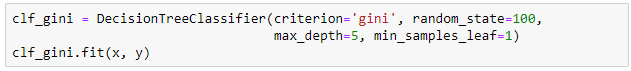

_Be sure to keep the white space._   
When you hit enter after the comma, it will automatically indent the next line of code to ensure that the proper tabbing is in place. 


In [15]:
# type the code to create the gini model
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=100,
                                  max_depth=5, min_samples_leaf=1)
clf_gini.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

We will test the model based on: outlook=sunny, temperature=cool, humidity=high, windy=True, which translates to [2, 0, 0, 1] .

>`clf_gini.predict([[2, 0, 0, 1]])`

In [16]:
# type the code to test outlook=sunny, temperature=cool, humidity=high, windy=True 
clf_gini.predict([[2, 0, 0, 1]])

array([0])

Of course, the result is the encoded value - that's what we provided to the model. To translate back to text, you can wrap the call with the `inverse_tranform` function.
>`print(le_play.inverse_transform(clf_gini.predict([[2, 0, 0, 1]])))`

In [17]:
# type the code to translate the result
print(le_play.inverse_transform(clf_gini.predict([[2, 0, 0, 1]])))

['no']


We will do a second test using: outlook=sunny, temperature=hot, humidity=normal, windy=False, which translates to [2, 1, 1, 0].
    
>`clf_gini.predict([[2, 1, 1, 0]])`


In [18]:
# type the code to test outlook=sunny, temperature=hot, humidity=normal, windy=False
clf_gini.predict([[2, 1, 1, 0]])

array([1])

Transform the result back to text.

>`print(le_play.inverse_transform(clf_gini.predict([[2, 1, 1, 0]])))`


In [19]:
# type the code to translate the result
print(le_play.inverse_transform(clf_gini.predict([[2, 1, 1, 0]])))

['yes']


#### Entropy Model

Entropy is the amount of information disorder or simply said is the amount of randomness in the data or uncertainty. The closer a score is to 1, the greater the disorder. The closer a score gets to zero, the disorder decreases. At the point where entropy is zero, there are no further decisions or splits to make.

Information gain increases the level of certainty in the model. Basically, using information gain, we want to determine which attribute in a given set of training feature vectors is most useful. In other words, information gain tells us how important a given attribute of the feature vectors is and decides where to split the data.

----
#### Create the Entropy model

>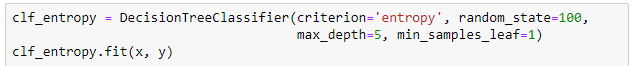  

_Be sure to keep the white space._   
When you hit enter after the comma, it will automatically indent the next line of code to ensure that the proper tabbing is in place. 

In [20]:
# type the code to create the entropy model
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100, 
                                     max_depth=5, min_samples_leaf=1)
clf_entropy.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

#### Making Predictions
We will test the model based on: outlook=sunny, temperature=cool, humidity=high, windy=True, which translates to [2, 0, 0, 1] .

>`clf_entropy.predict([[2, 0, 0, 1]])`

In [21]:
# type the code to test outlook=sunny, temperature=cool, humidity=high, windy=True 
clf_entropy.predict([[2, 0, 0, 1]])

array([0])

Transform the result back to text.

>`print(le_play.inverse_transform(clf_entropy.predict([[2, 0, 0, 1]])))`


In [22]:
# type the code to translate the result
print(le_play.inverse_transform(clf_entropy.predict([[2, 0, 0, 1]])))

['no']


We will do a second test using: outlook=sunny, temperature=hot, humidity=normal, windy=False, which translates to [2, 1, 1, 0].
    
>`clf_entropy.predict([[2, 1, 1, 0]])`


In [23]:
# type the code to test outlook=sunny, temperature=hot, humidity=normal, windy=False
clf_entropy.predict([[2, 1, 1, 0]])

array([1])

Transform the result back to text.

>`print(le_play.inverse_transform(clf_entropy.predict([[2, 1, 1, 0]])))`


In [24]:
# type the code to translate the result
print(le_play.inverse_transform(clf_entropy.predict([[2, 1, 1, 0]])))

['yes']


Finally, we will use graphviz, with some help from subprocess and IPython.display, to visualize the results. This will create a png file which will be saved with your notebook files.

We are using the variables we created earlier:
 - `clf_entrophy`
 - `features`
 - `le_play_classes_`
>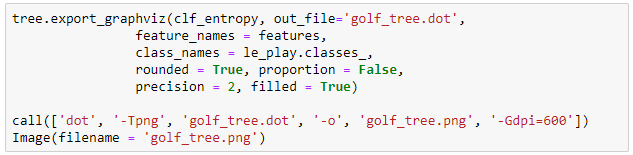

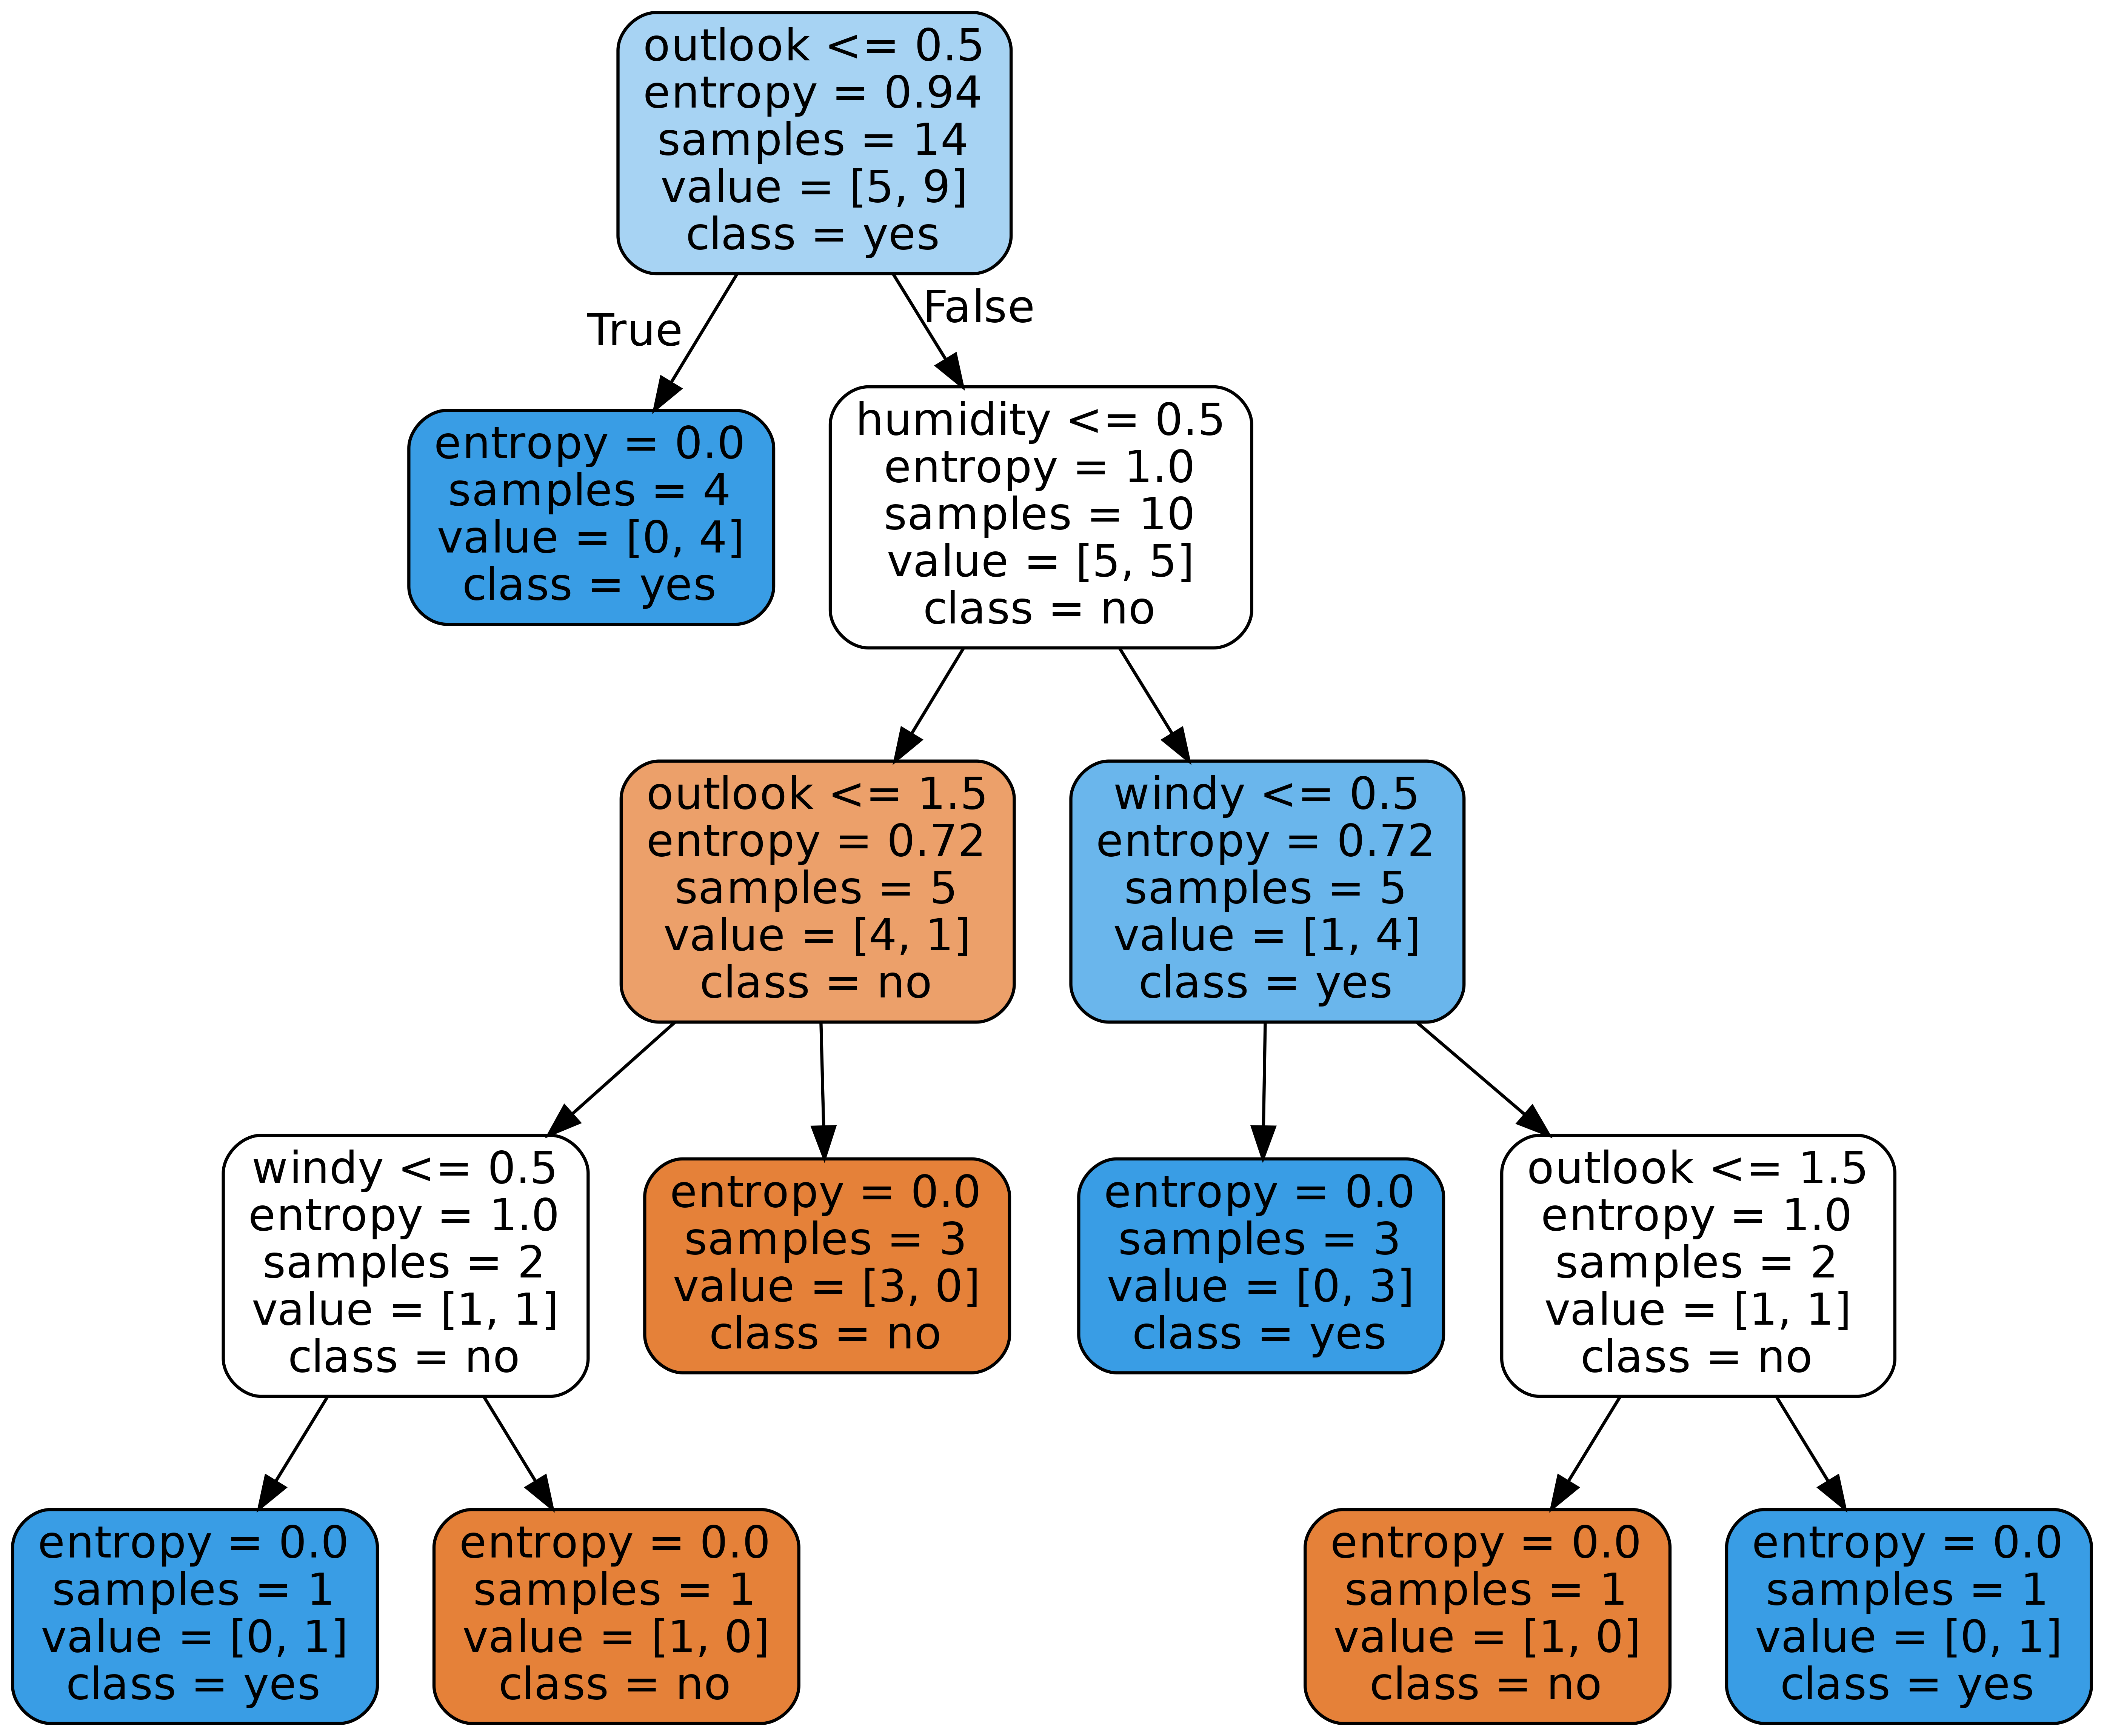

In [25]:
# type the code to display the results
tree.export_graphviz(clf_entropy, out_file='golf_tree.dot',
                    feature_names = features,
                    class_names = le_play.classes_,
                    rounded = True, proportion = False, 
                    precision = 2, filled = True)

call(['dot', '-Tpng', 'golf_tree.dot', '-o', 'golf_tree.png', '-Gdpi=600'])
Image(filename ='golf_tree.png')

### Interpreting the Results
We use entropy to split this tree. Entropy measures disorder or uncertainty, using scores between 0 and 1. 

The closer a score is to 1, the greater the disorder. In our tree, the humidity <=0.5 node has entropy of 1. That is because at that level, there are 10 samples; 5 represent "yes" and 5 represent "no" for "Play Golf". We cannot accurately predict if golf will be played at that node.

The model is looking at the target of "Play Golf", so it will look for what can provide the largest information gain at each decision. 
 
----

The first split is on Outlook. It asks if Outlook is <=0.5, which is the encoded value for "Overcast". 

Humidity at "Normal" has the next biggest split; after the split by humidity, it can get terminal nodes for outlook and windy. 

##### Decision Time

If it's overcast, then play golf is a "yes". There are no other steps after that - just grab the clubs and head to the course!

If it's not overcast, we ask if the humidity is high (<=0.5). If it is not high (normal), we move to the false decision node and we ask if it is windy (<=0.5). If it is windy, we move to the true terminal node and see play golf is "yes". It doesn't matter if it's rainy or sunny as the conditions are met to give us "Play Golf = yes".

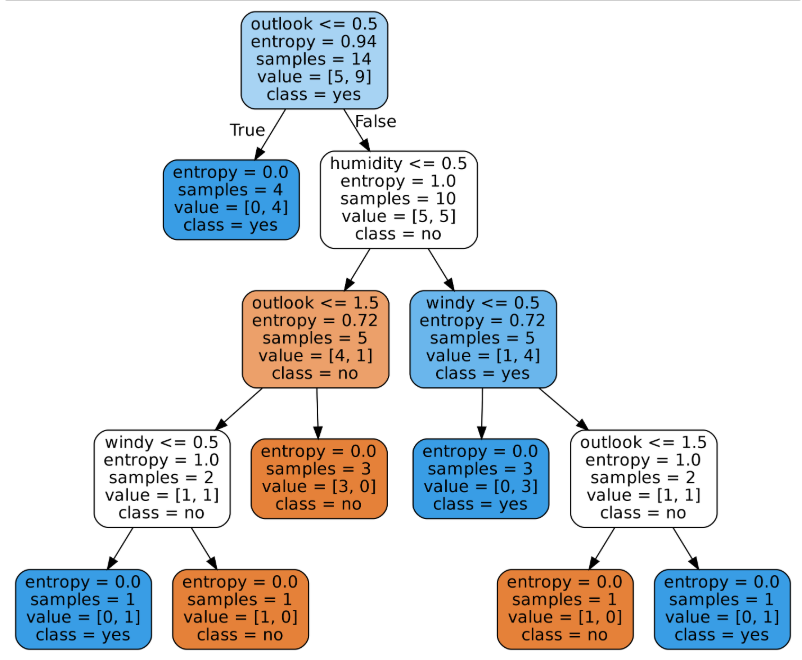

### Regression Tree
#### Sample Data
For this example, we are using the iris dataset to predict the species of iris based on measurements.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

To start, import the data. We are using a dataset available in the sklearn package, so we only need to load and assign to a variable. 
>`iris = load_iris()`

In [26]:
# type the code to load the iris dataset
iris = load_iris()

Next we will assign the features and target for the data. This dataset has been preprocessed to make it easy to use in machine learning.

For our golf data, we assigned features and targets. This time the data has the columns defined, so data = features. Less code is needed.  
_Note: be sure to use upper case X and Y as the variables_

>`X = iris.data`  
>`Y = iris.target`

In [27]:
# assign features to X and target to Y
X = iris.data
Y = iris.target

We will use the same code we used for the golf gini tree, with a new variable name of `iris_tree`.  

>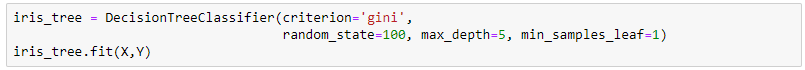

In [28]:
# type the code to create the gini model
iris_tree = DecisionTreeClassifier(criterion='gini', random_state=100,
                                  max_depth=5, min_samples_leaf=1)
iris_tree.fit(X, Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

We will use the same code for displaying the golf_data, but with new variables passed through to display the iris model.

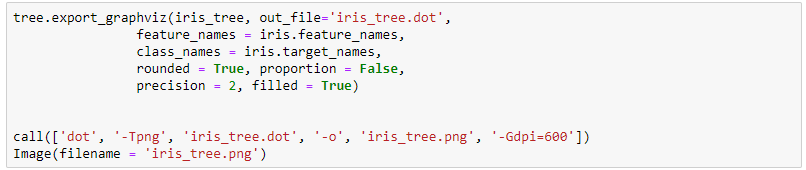

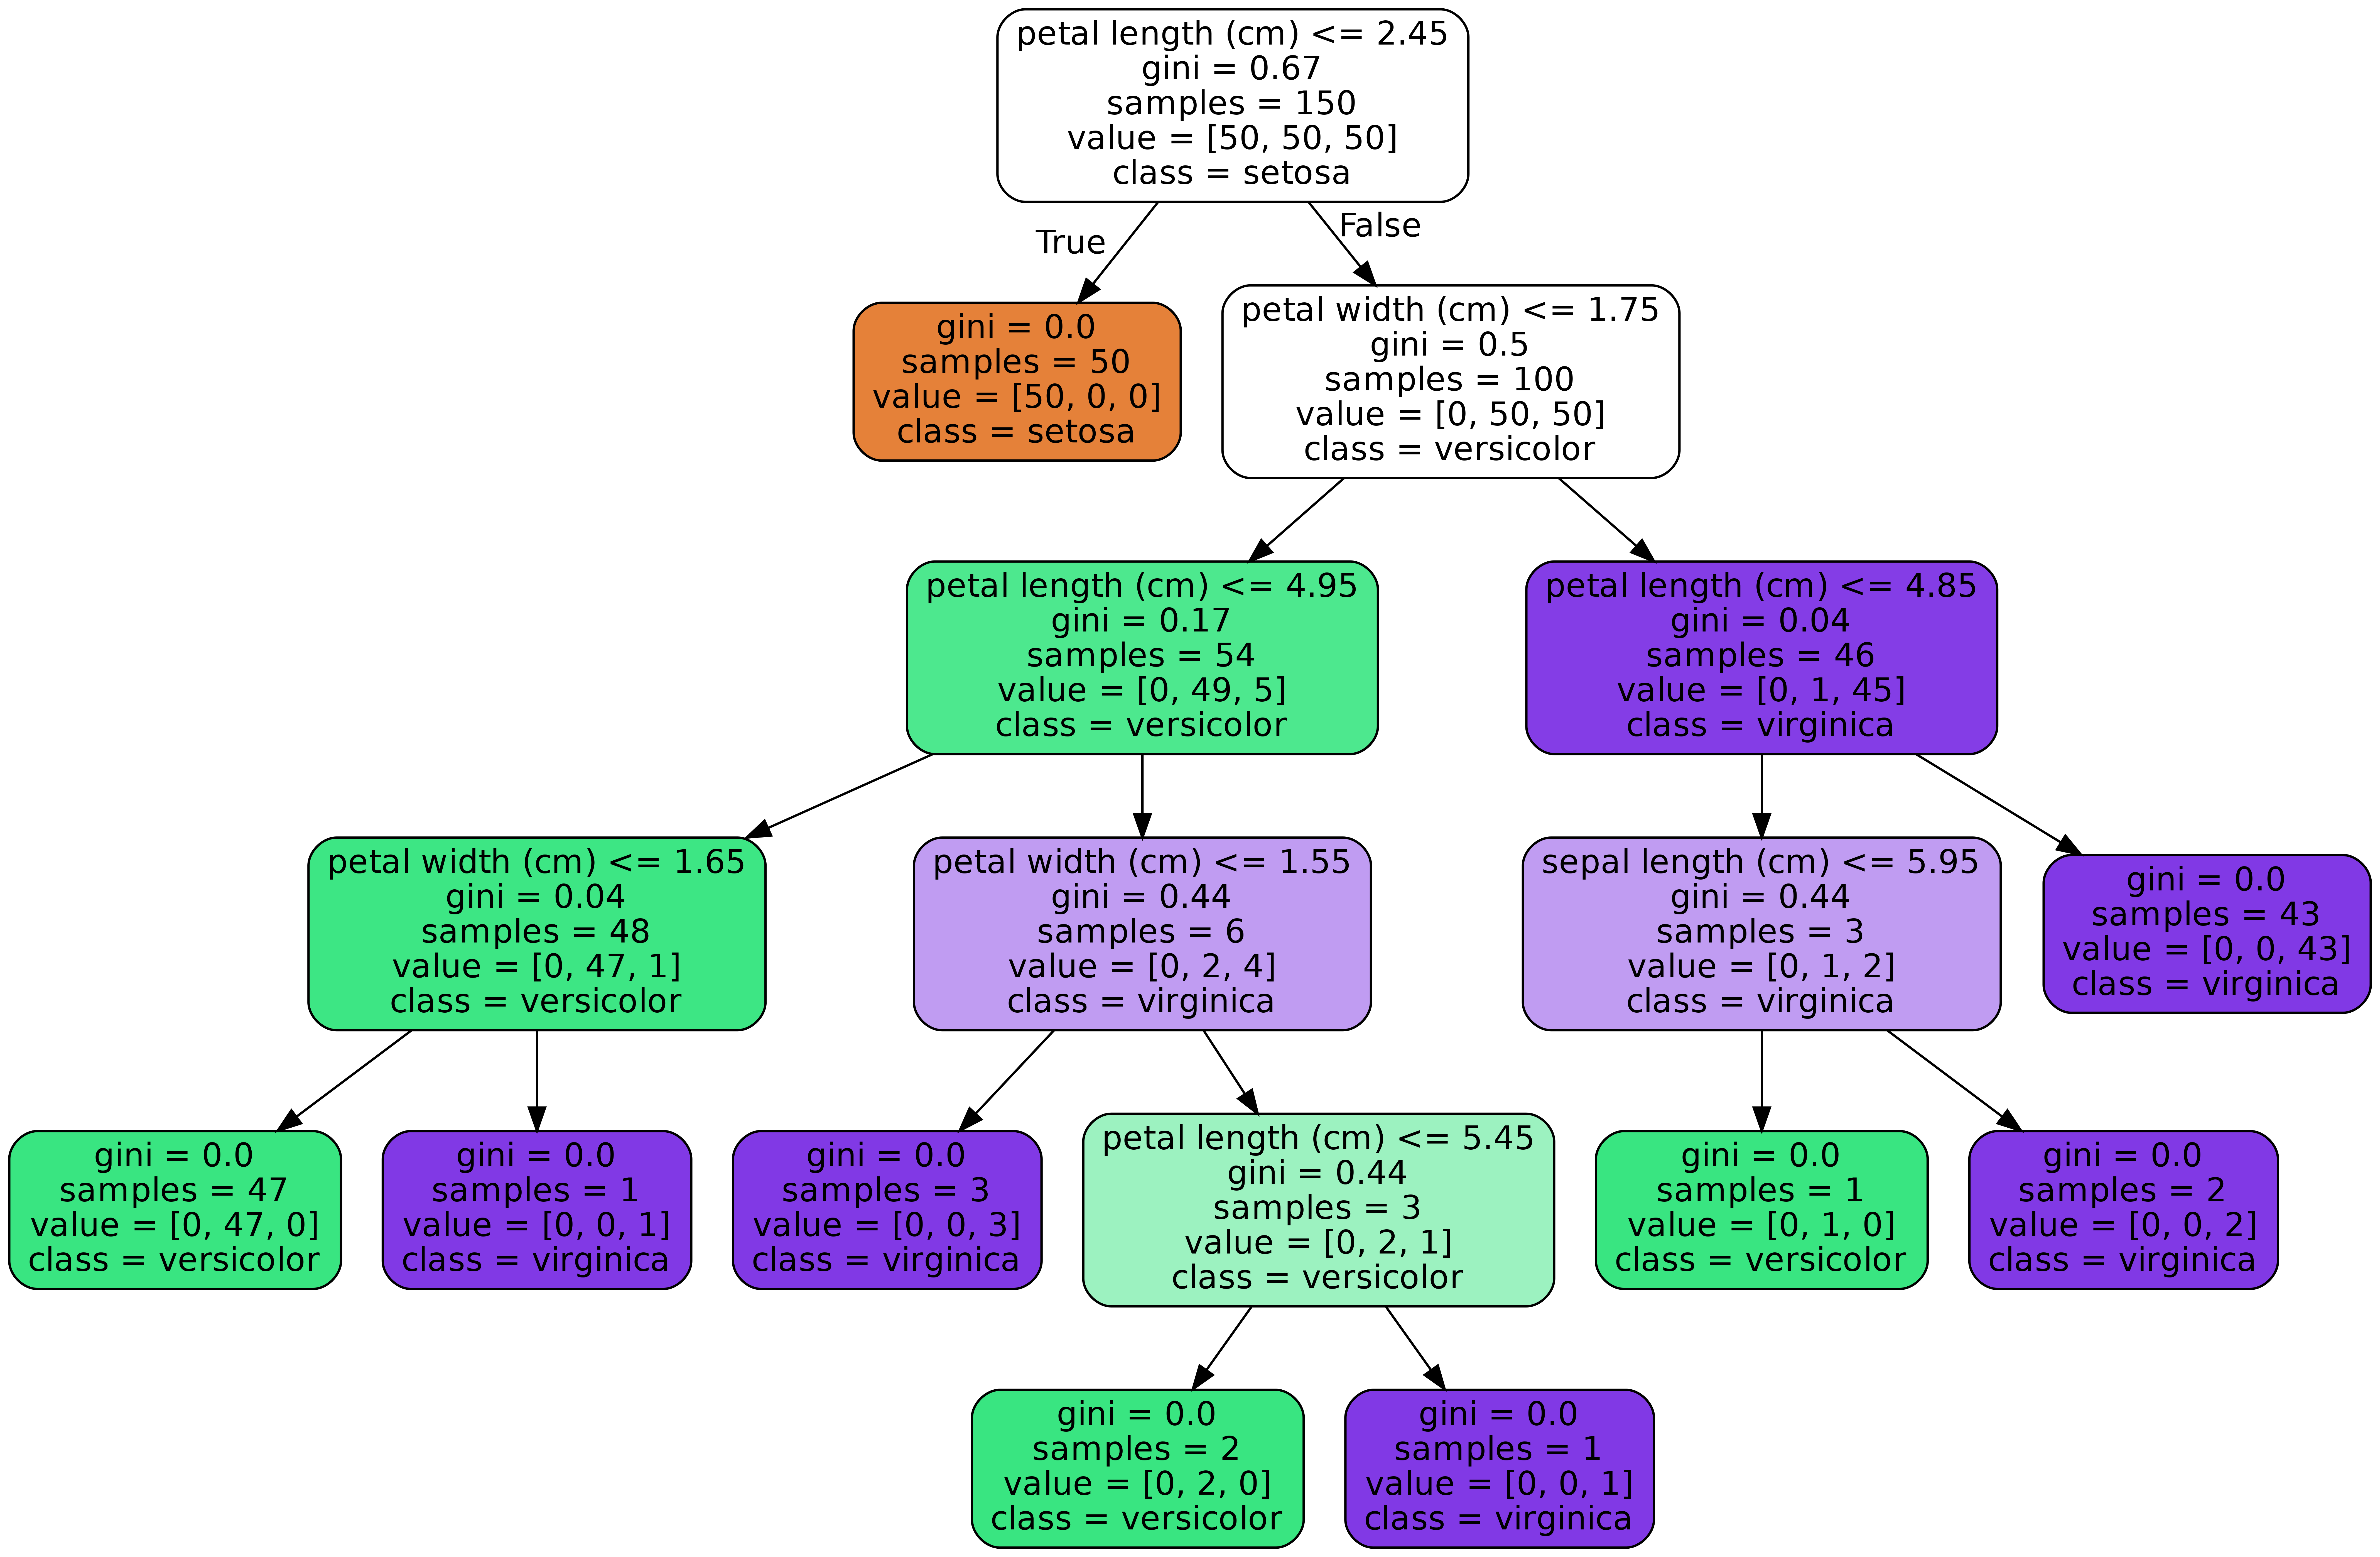

In [32]:
# type the code to display the iris gini model
# type the code to display the results
tree.export_graphviz(iris_tree, out_file='iris_tree.dot',
                    feature_names = iris.feature_names,
                    class_names = iris.target_names,
                    rounded = True, proportion = False, 
                    precision = 2, filled = True)

call(['dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png', '-Gdpi=600'])
Image(filename ='iris_tree.png')

### Interpreting the Results
We used gini to split this tree. Gini measures how often a randomly chosen element from the set would be incorrectly labelled. The closer the score is to 0, the more pure the data.

In our tree, the petal width (cm) <=1.75 mode has a gini score of 0.5. This is the maximum score because it's a probablity measure of two possible outcomes based on there being only 2 classes of irises to label { value = [ 0, 50, 50 ] }. This means we would incorrectly label irises about half the time from this node.

The first split is on Petal Length. It asks if Petal Length (cm) <=2.45. If that is true, then you can label 50 of the samples as "Setosa", with certainty. If not, then you look at Petal Width (cm). You can see the probablity of mislabelling the irises at each decision node.

#### Making Predictions
We will enter the measurements of two new iris samples to determine the species.  

Sample One
- sepal length = 5, sepal width = 5
- petal length = 1, petal width = 3  

Sample Two
- sepal length = 5, sepal width = 5
- petal length = 2.6, petal width = 1.5

>`sample_one_pred = int(iris_tree.predict([[5, 5, 1, 3]]))`  
>`sample_two_pred = int(iris_tree.predict([[5, 5, 2.6, 1.5]]))`


In [33]:
# type the code to create the new samples
sample_one_pred = int(iris_tree.predict([[5,5,1,3]]))
sample_two_pred = int(iris_tree.predict([[5,5,2.6,1.5]]))

Next we will display the predictions.

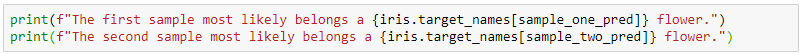

In [34]:
# type the code to display the predictions
print(f"The first sample most likely belongs a {iris.target_names[sample_one_pred]} flower.")
print(f"The second sample most likely belongs a {iris.target_names[sample_two_pred]} flower.")


The first sample most likely belongs a setosa flower.
The second sample most likely belongs a versicolor flower.


In [35]:
# add a comment explaining a scenario you could use a decision tree


Download this completed notebook and upload to the Teams Assignment to mark it as complete. 
#### File > Download as > Notebook (.ipynb)